<a href="https://colab.research.google.com/github/JeonghwaLee-TwinDAD/CarND-Traffic-Sign-Classification/blob/master/Keras_Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Traffic Sign Classification

In [2]:
import keras
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D

## 1. Dataset

### 1-1 Load sign-names,  training, validation, and test dataset

In [4]:
# Load pickled data

training_file = '/content/drive/My Drive/Colab_Notebooks/CarND/CarND-Traffic-Sign_Classifier/data/train.p'
validation_file= '/content/drive/My Drive/Colab_Notebooks/CarND/CarND-Traffic-Sign_Classifier/data/valid.p'
testing_file = '/content/drive/My Drive/Colab_Notebooks/CarND/CarND-Traffic-Sign_Classifier/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Get the signnames from cvs

In [16]:
import pandas as pd

image_labels = pd.read_csv('signnames.csv').values
label_count = image_labels.shape[0]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check up the data-set

In [ ]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train.shape
n_classes =  np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


In [ ]:
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("Sign classes : ", sign_classes)
print("Class indices : ", class_indices)
print("Class Count : ", class_counts)

Sign classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Class indices :  [ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]
Class Count :  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


### 1-2 Check out the sign samples
We will go through all dataset classes, noting number of samples and plotting 10 random images representing each class.

Class 0: [0 'Speed limit (20km/h)'] 180 samples


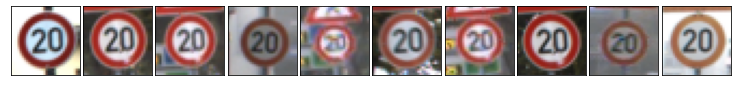

--------------------------------------------------------------------------------------

Class 1: [1 'Speed limit (30km/h)'] 1980 samples


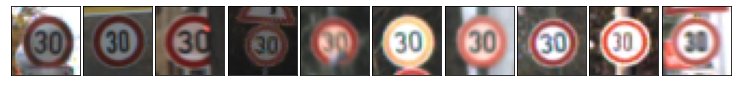

--------------------------------------------------------------------------------------

Class 2: [2 'Speed limit (50km/h)'] 2010 samples


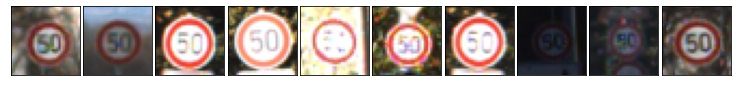

--------------------------------------------------------------------------------------

Class 3: [3 'Speed limit (60km/h)'] 1260 samples


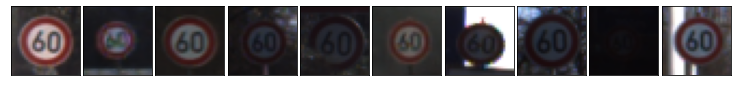

--------------------------------------------------------------------------------------

Class 4: [4 'Speed limit (70km/h)'] 1770 samples


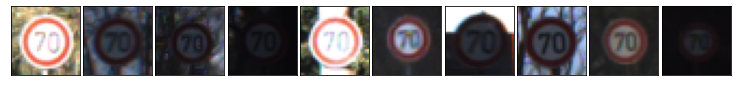

--------------------------------------------------------------------------------------

Class 5: [5 'Speed limit (80km/h)'] 1650 samples


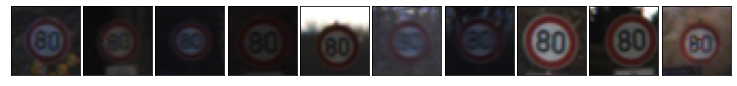

--------------------------------------------------------------------------------------

Class 6: [6 'End of speed limit (80km/h)'] 360 samples


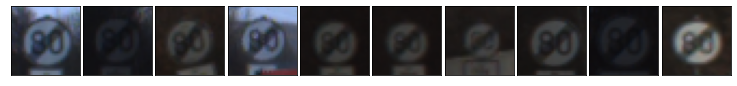

--------------------------------------------------------------------------------------

Class 7: [7 'Speed limit (100km/h)'] 1290 samples


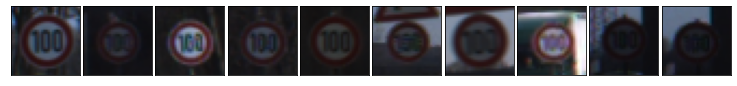

--------------------------------------------------------------------------------------

Class 8: [8 'Speed limit (120km/h)'] 1260 samples


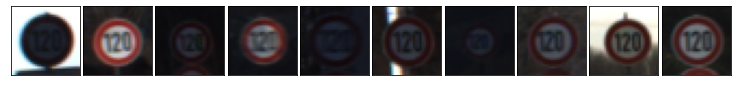

--------------------------------------------------------------------------------------

Class 9: [9 'No passing'] 1320 samples


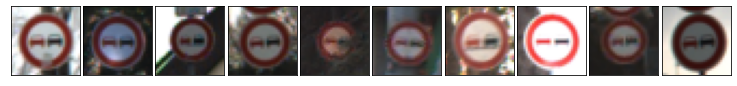

--------------------------------------------------------------------------------------

Class 10: [10 'No passing for vehicles over 3.5 metric tons'] 1800 samples


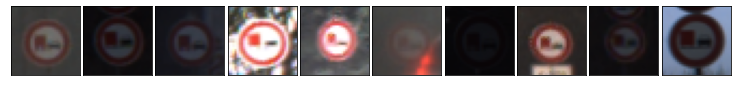

--------------------------------------------------------------------------------------

Class 11: [11 'Right-of-way at the next intersection'] 1170 samples


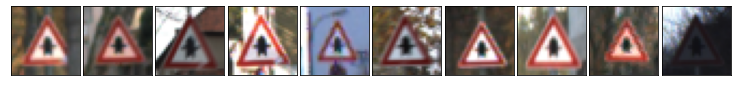

--------------------------------------------------------------------------------------

Class 12: [12 'Priority road'] 1890 samples


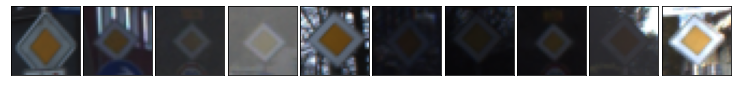

--------------------------------------------------------------------------------------

Class 13: [13 'Yield'] 1920 samples


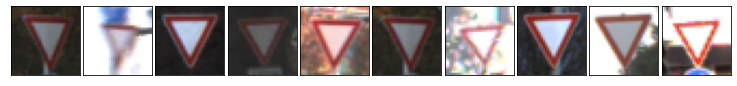

--------------------------------------------------------------------------------------

Class 14: [14 'Stop'] 690 samples


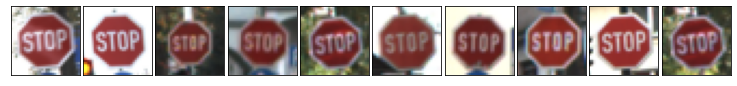

--------------------------------------------------------------------------------------

Class 15: [15 'No vehicles'] 540 samples


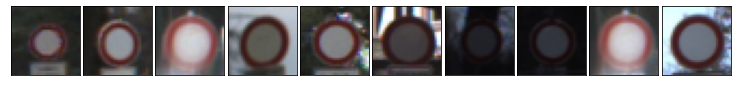

--------------------------------------------------------------------------------------

Class 16: [16 'Vehicles over 3.5 metric tons prohibited'] 360 samples


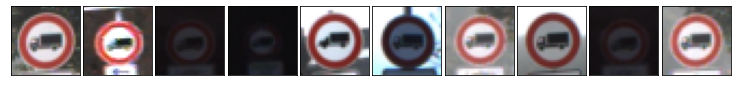

--------------------------------------------------------------------------------------

Class 17: [17 'No entry'] 990 samples


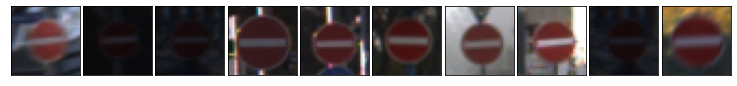

--------------------------------------------------------------------------------------

Class 18: [18 'General caution'] 1080 samples


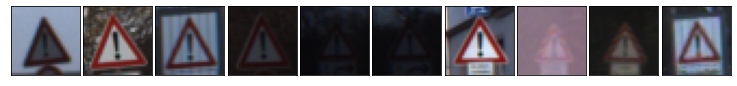

--------------------------------------------------------------------------------------

Class 19: [19 'Dangerous curve to the left'] 180 samples


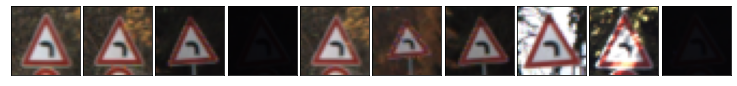

--------------------------------------------------------------------------------------

Class 20: [20 'Dangerous curve to the right'] 300 samples


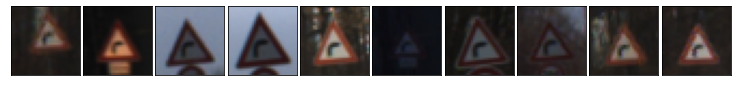

--------------------------------------------------------------------------------------

Class 21: [21 'Double curve'] 270 samples


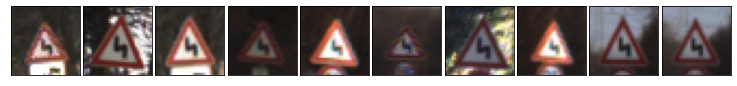

--------------------------------------------------------------------------------------

Class 22: [22 'Bumpy road'] 330 samples


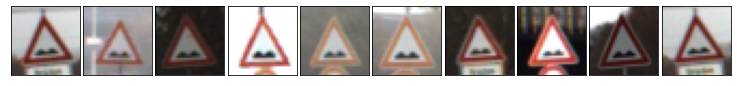

--------------------------------------------------------------------------------------

Class 23: [23 'Slippery road'] 450 samples


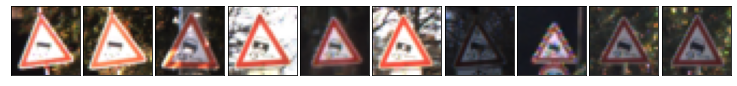

--------------------------------------------------------------------------------------

Class 24: [24 'Road narrows on the right'] 240 samples


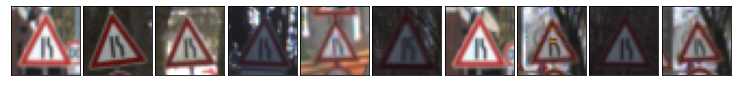

--------------------------------------------------------------------------------------

Class 25: [25 'Road work'] 1350 samples


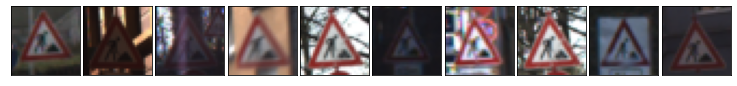

--------------------------------------------------------------------------------------

Class 26: [26 'Traffic signals'] 540 samples


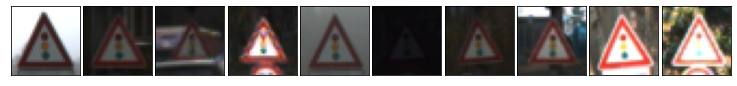

--------------------------------------------------------------------------------------

Class 27: [27 'Pedestrians'] 210 samples


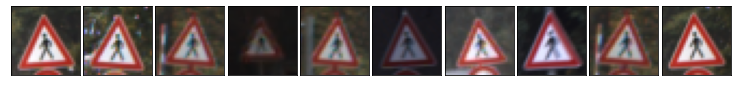

--------------------------------------------------------------------------------------

Class 28: [28 'Children crossing'] 480 samples


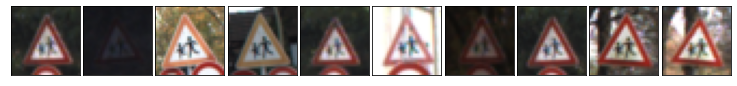

--------------------------------------------------------------------------------------

Class 29: [29 'Bicycles crossing'] 240 samples


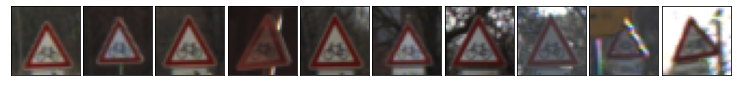

--------------------------------------------------------------------------------------

Class 30: [30 'Beware of ice/snow'] 390 samples


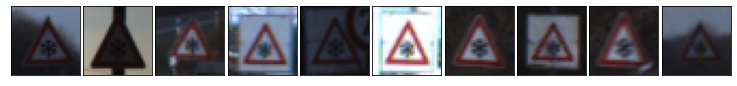

--------------------------------------------------------------------------------------

Class 31: [31 'Wild animals crossing'] 690 samples


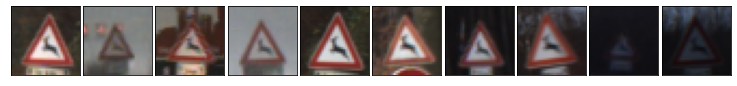

--------------------------------------------------------------------------------------

Class 32: [32 'End of all speed and passing limits'] 210 samples


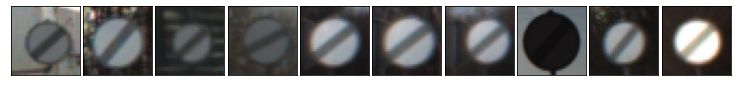

--------------------------------------------------------------------------------------

Class 33: [33 'Turn right ahead'] 599 samples


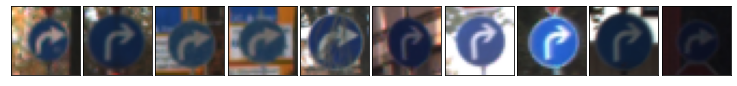

--------------------------------------------------------------------------------------

Class 34: [34 'Turn left ahead'] 360 samples


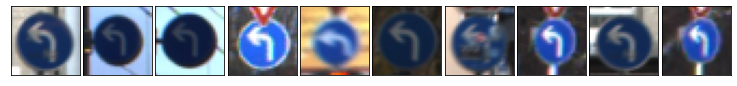

--------------------------------------------------------------------------------------

Class 35: [35 'Ahead only'] 1080 samples


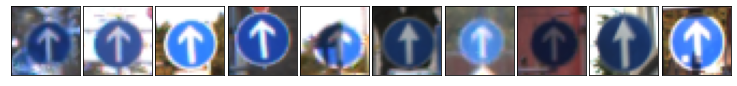

--------------------------------------------------------------------------------------

Class 36: [36 'Go straight or right'] 330 samples


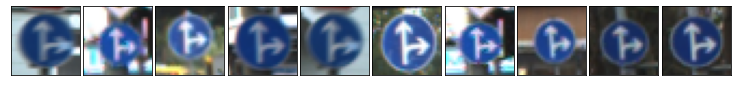

--------------------------------------------------------------------------------------

Class 37: [37 'Go straight or left'] 180 samples


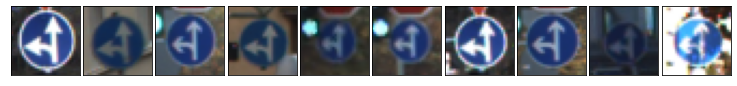

--------------------------------------------------------------------------------------

Class 38: [38 'Keep right'] 1860 samples


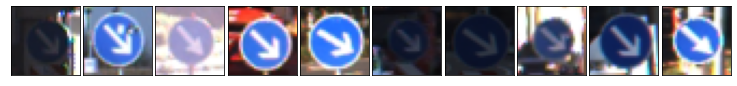

--------------------------------------------------------------------------------------

Class 39: [39 'Keep left'] 270 samples


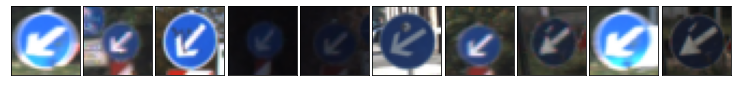

--------------------------------------------------------------------------------------

Class 40: [40 'Roundabout mandatory'] 300 samples


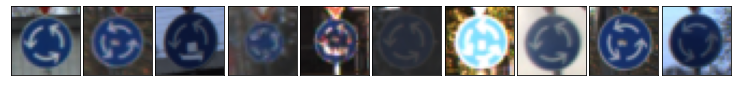

--------------------------------------------------------------------------------------

Class 41: [41 'End of no passing'] 210 samples


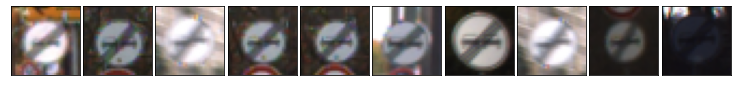

--------------------------------------------------------------------------------------

Class 42: [42 'End of no passing by vehicles over 3.5 metric tons'] 210 samples


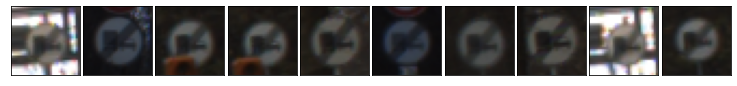

--------------------------------------------------------------------------------------



In [ ]:
import random

col_width = max(len(name) for name in image_labels)
for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s %d samples" % (c, col_width, image_labels[c], c_count))
    
    # Visualization sample images
    fig = plt.figure(figsize = (10, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()        
    print("--------------------------------------------------------------------------------------\n")

### 1-3 Display histogram to show class/label distribution across data set

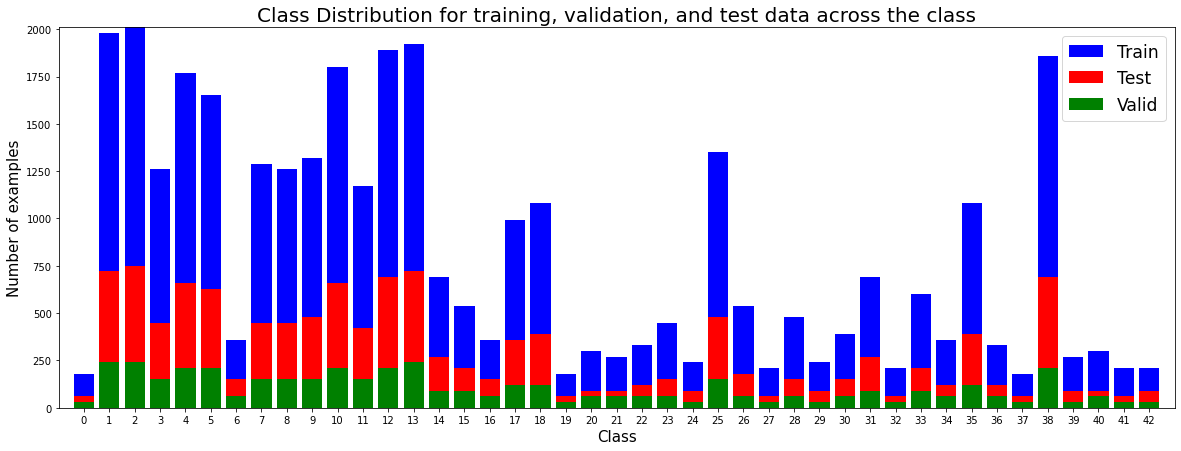

In [ ]:
%matplotlib inline

# Count frequency of each label
labels_train, counts_train = np.unique(y_train, return_counts=True)
labels_valid, counts_valid = np.unique(y_valid, return_counts=True)
labels_test, counts_test = np.unique(y_test, return_counts=True)

fig, axs = plt.subplots(figsize=(20,7))
axs = plt.subplot(111)

# Plot the histogram
axs.bar(labels_train, counts_train, tick_label=labels_train, width=0.8, color='b', align='center',label='Train')
axs.bar(labels_test, counts_test, tick_label=labels_test, width=0.8, color='r', align='center', label='Test')
axs.bar(labels_valid, counts_valid, tick_label=labels_valid, width=0.8, color='g', align='center', label='Valid')

axs.legend(loc=0, fontsize='xx-large')
axs.autoscale(tight=True)

plt.xlabel('Class',fontsize = 15)
plt.ylabel('Number of examples',fontsize = 15)
plt.xlim([-1, 43])

plt.title('Class Distribution for training, validation, and test data across the class', fontsize = 20)
plt.show()

## 2. Model Architecture


### 2-1 data generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
data_generator = ImageDataGenerator(
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.2,
                    shear_range=0.1,
                    rotation_range=10)
 
data_generator.fit(X_train)

In [ ]:
print("-----TRAIN FEATURES-----")
print(X_train.shape)

print("-----VALID FEATURES-----")
print(X_valid.shape)

print("------TEST FEATURES-----")
print(X_test.shape)

-----TRAIN FEATURES-----
(34799, 32, 32, 3)
-----VALID FEATURES-----
(4410, 32, 32, 3)
------TEST FEATURES-----
(12630, 32, 32, 3)


In [ ]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test  = X_test / 255

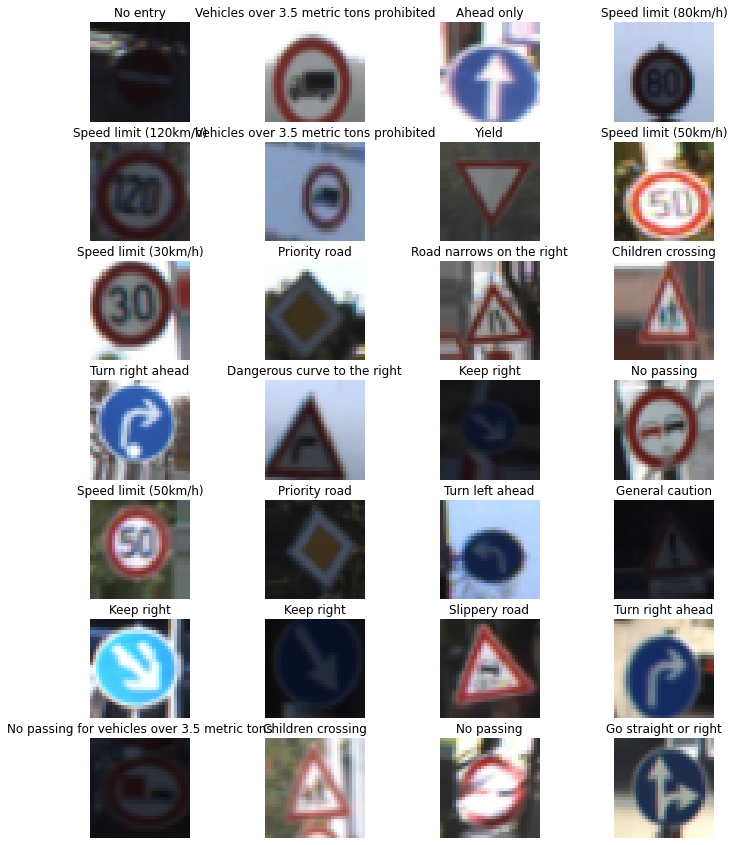

In [ ]:
sample_batch_size = 28
sample_batches = data_generator.flow(X_train, y_train, batch_size=sample_batch_size)
X_sample, y_sample = next(sample_batches)

figure = plt.figure(figsize=(12,15))    
figure.tight_layout()

for index in range(sample_batch_size):
    axes = figure.add_subplot(7, 4, index+1)
    title = image_labels[y_sample[index]][1]
    plt.imshow(X_sample[index]) 
    plt.title(title)
    plt.axis('off')

plt.show()

In [ ]:
from keras.utils import np_utils

# One Hot encode the labels to the variable y_one_hot
y_train_onehot = np_utils.to_categorical(y_train, n_classes)
y_valid_onehot = np_utils.to_categorical(y_valid, n_classes)
y_test_onehot = np_utils.to_categorical(y_test, n_classes)

print(y_train_onehot.shape)
print(y_valid_onehot.shape)
print(y_test_onehot.shape)

(34799, 43)
(4410, 43)
(12630, 43)


### 2-2 Build model

In [ ]:
def create_lenet_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (3,3), activation='relu'))    
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_lenet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        4560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

### 2-3 Run the model

In [ ]:
history=model.fit_generator(data_generator.flow(X_train, y_train_onehot, batch_size = 50), 
                            validation_data=(X_valid, y_valid_onehot), 
                            epochs=10, steps_per_epoch=500, shuffle = 1)

Epoch 1/10
500/500 [==============================] - 12s 25ms/step - loss: 2.3164 - accuracy: 0.3433 - val_loss: 1.0276 - val_accuracy: 0.6621
Epoch 2/10
500/500 [==============================] - 12s 24ms/step - loss: 1.0243 - accuracy: 0.6731 - val_loss: 0.4393 - val_accuracy: 0.8585
Epoch 3/10
500/500 [==============================] - 12s 24ms/step - loss: 0.5944 - accuracy: 0.8095 - val_loss: 0.2516 - val_accuracy: 0.9279
Epoch 4/10
500/500 [==============================] - 12s 24ms/step - loss: 0.4011 - accuracy: 0.8733 - val_loss: 0.1712 - val_accuracy: 0.9506
Epoch 5/10
500/500 [==============================] - 12s 25ms/step - loss: 0.3027 - accuracy: 0.9040 - val_loss: 0.1821 - val_accuracy: 0.9465
Epoch 6/10
500/500 [==============================] - 12s 24ms/step - loss: 0.2490 - accuracy: 0.9225 - val_loss: 0.1686 - val_accuracy: 0.9569
Epoch 7/10
500/500 [==============================] - 12s 25ms/step - loss: 0.2158 - accuracy: 0.9345 - val_loss: 0.1199 - val_accuracy:

In [ ]:
model.save('model.h5')  # creates a HDF5 file 'my_model.h5'

### 2-4 Evaluate the model 

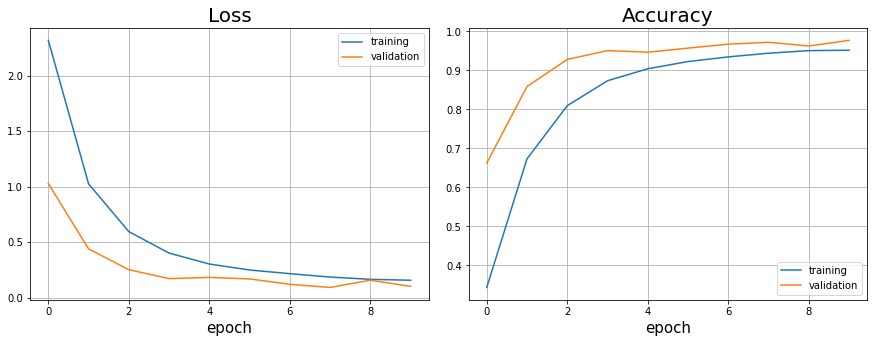

In [ ]:
#Visualized the images 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace = .2, wspace=.1)

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training', 'validation'])
ax1.set_title('Loss',fontsize = '20')
ax1.set_xlabel('epoch',fontsize = '15')
ax1.grid()

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Accuracy',fontsize = '20')
ax2.set_xlabel('epoch',fontsize = '15')
ax2.grid()

In [ ]:
score = model.evaluate(X_test, y_test_onehot, verbose=2)
print('Test score:', score[0])
print('Test accuracy:', score[1])

395/395 - 1s - loss: 0.1504 - accuracy: 0.9628
Test score: 0.15038833022117615
Test accuracy: 0.9627870321273804


In [ ]:
sample_test_size = 28
X_test_predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


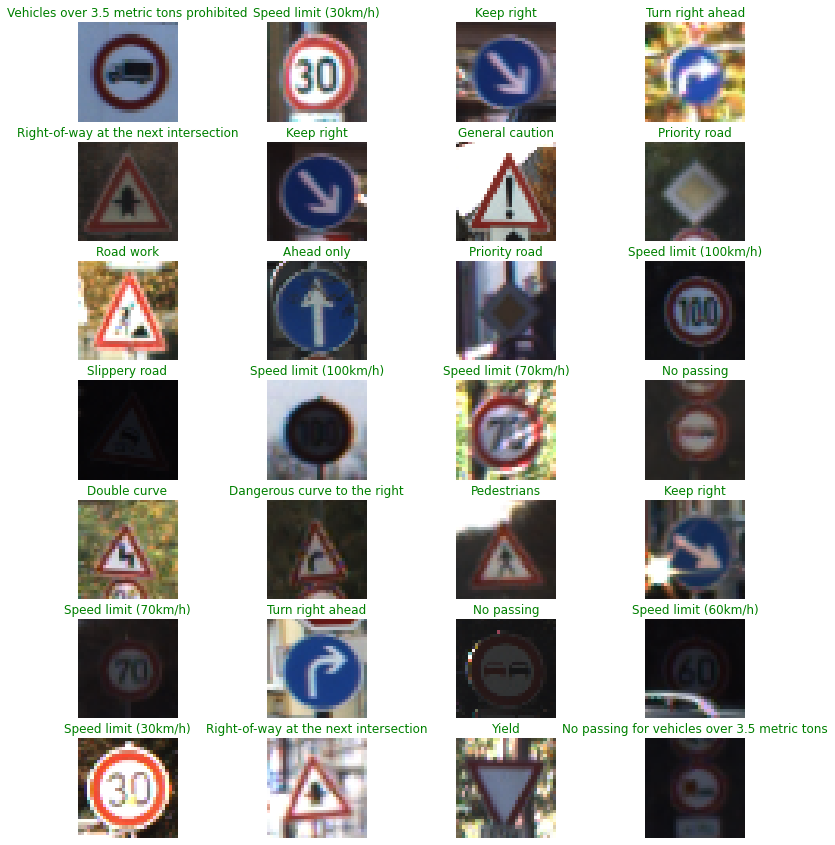

In [ ]:
figure = plt.figure(figsize=(13,15))    
figure.tight_layout()

for index in range(sample_test_size):
    axes = figure.add_subplot(7, 4, index+1)
    label_prediction = image_labels[X_test_predictions[index]][1]
    label_actual = image_labels[y_test[index]][1]
    plt.imshow(X_test[index]) 
    plt.axis('off')

    if(label_prediction == label_actual):
        plt.title(label_prediction, color="green")
    else:
        plt.title(label_prediction, color="red")
    
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


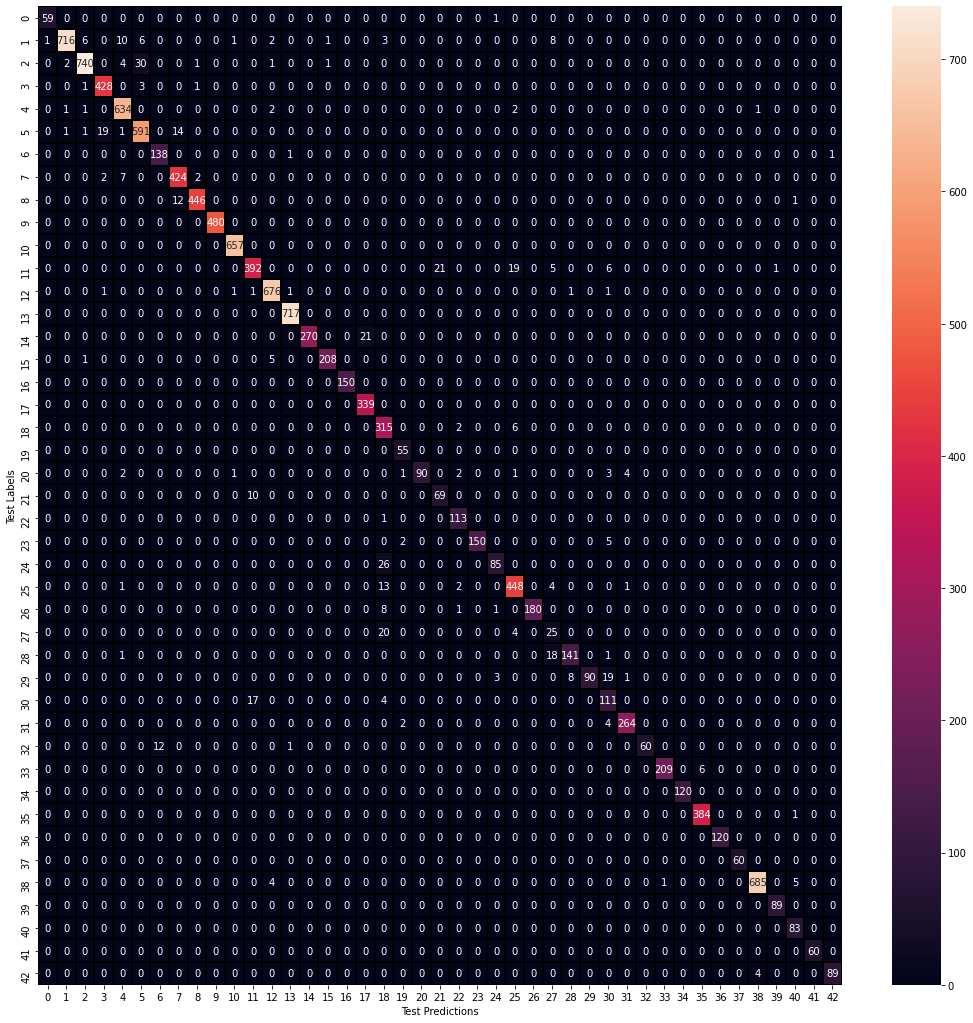

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(X_test_predictions, y_test)

f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(cm, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Test Predictions")
plt.ylabel("Test Labels")
plt.show()

## 3. Test a Model on New Images

### 3-1 Load the images and plot them here.

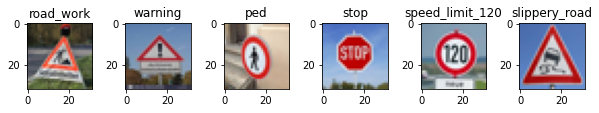

In [ ]:
import os
from PIL import Image

X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)
num_images = 6

# Load images from .png files to `X_custom` NumPy array

fig, axs = plt.subplots(1,num_images, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
i = 0
# Read all image into the folder
for filename in os.listdir("./german_images"):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join("./german_images", filename))
        img = img.resize((32, 32))
        
        X_img = np.array(img) / 255
        # Print the names and pictures of the target images
        axs[i].set_title('%s' % filename[:-4])
        axs[i].imshow(X_img)
        
        X_custom = np.append(X_custom, [X_img[:, :, :3]], axis = 0)
        i += 1

### 3-2 Preprocess image data

In [ ]:
y_labels = [25, 18, 28, 14, 8, 23] # road work (25), general caution(18), children crossing (28), stop (14),speed limit120 (8), slibery road(23)
y_onehot = np_utils.to_categorical(y_labels, n_classes)

print(X_custom.shape)
print(y_onehot.shape)

(6, 32, 32, 3)
(6, 43)


In [ ]:
from keras.models import load_model

# Evaluate model on new testing data
model = load_model('model.h5')
scoe = model.evaluate(X_custom, y_onehot)
predictions = model.predict_proba(X_custom)

print('Test score:', score[0])
print('Test accuracy:', score[1])
print(predictions.shape)

1/1 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.6667
Test score: 0.15038833022117615
Test accuracy: 0.9627870321273804
(6, 43)


### 3-3 For every example plot original image, preprocessed image, and model predictions.

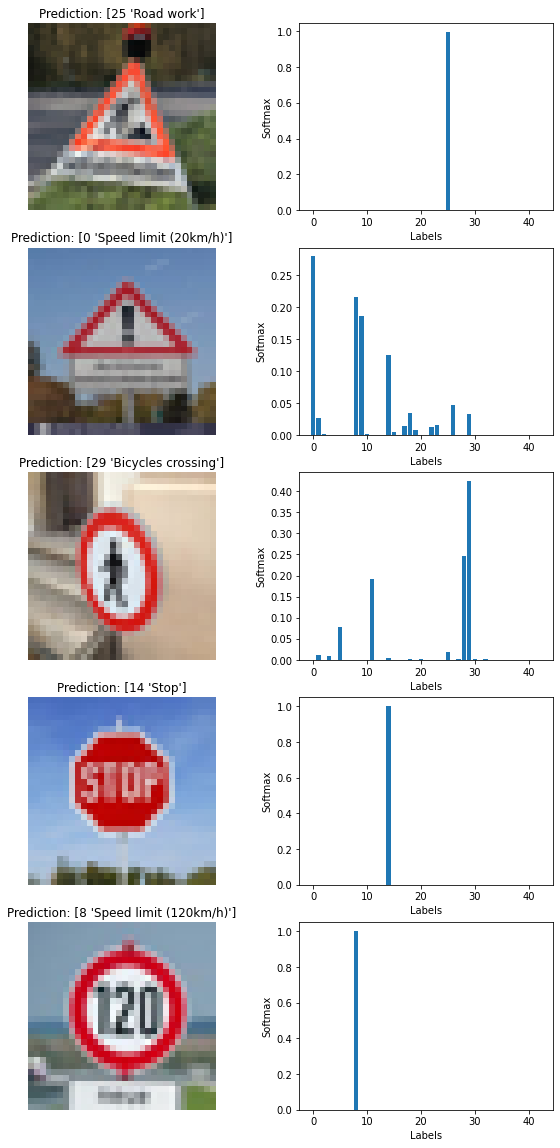

In [ ]:
# Plot the result
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.ravel()
for i in range(10):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(X_custom[i // 2])
        axs[i].set_title("Prediction: %s" % image_labels[np.argmax(predictions[i // 2])])
    else:
        axs[i].bar(np.arange(43), predictions[i // 2])
        axs[i].set_ylabel("Softmax")
        axs[i].set_xlabel("Labels")

plt.show()